# Cluster Analysis
---



## Hierarchical clustering
Broadly speaking, we:
* Find the closest two things
* Put them together
* Find the next closest things!

This requires:
* A defined distance metric. How do you say how close things are to each other?
  * Common examples might be the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), [Manhattan distance](https://en.wikipedia.org/wiki/Manhattan_distance), and correlation similarity.
* A merging approach

And we get:
* A tree that shows how close things are to each other - a dendrogram

### An example.

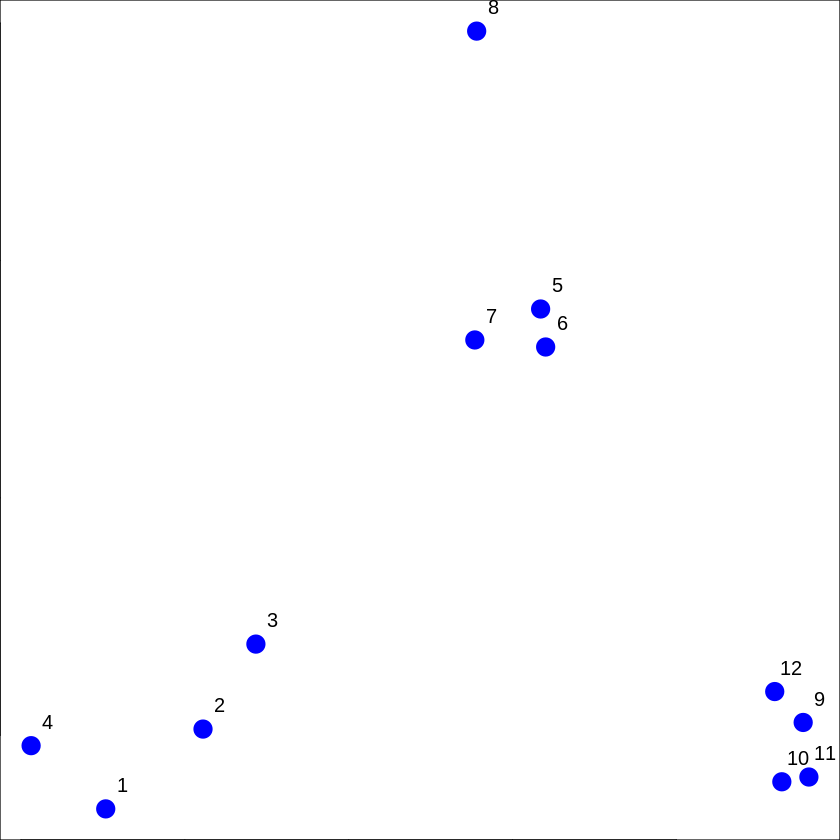

In [5]:
# Generate a plot
set.seed(1234)
par(mar = c(0, 0, 0, 0))
x <- rnorm(12, mean = rep(1:3, each=4), sd=0.2)
y <- rnorm(12, mean = rep(c(1, 2, 1), each=4), sd=0.2)
plot(x, y, col="blue", pch=19, cex=2)
text(x + 0.05, y + 0.05, labels=as.character(1:12))

In [7]:
# Generate the distances
dataFrame <- data.frame(x=x, y=y)
dist(dataFrame)

            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

In [12]:
distxy <- dist(dataFrame)
hClustering <- hclust(distxy)
str(hClustering)

List of 7
 $ merge      : int [1:11, 1:2] -5 -10 -9 2 -7 -2 -1 -8 6 4 ...
 $ height     : num [1:11] 0.0815 0.0832 0.1085 0.208 0.2167 ...
 $ order      : int [1:12] 2 3 1 4 10 11 9 12 8 7 ...
 $ labels     : NULL
 $ method     : chr "complete"
 $ call       : language hclust(d = distxy)
 $ dist.method: chr "euclidean"
 - attr(*, "class")= chr "hclust"


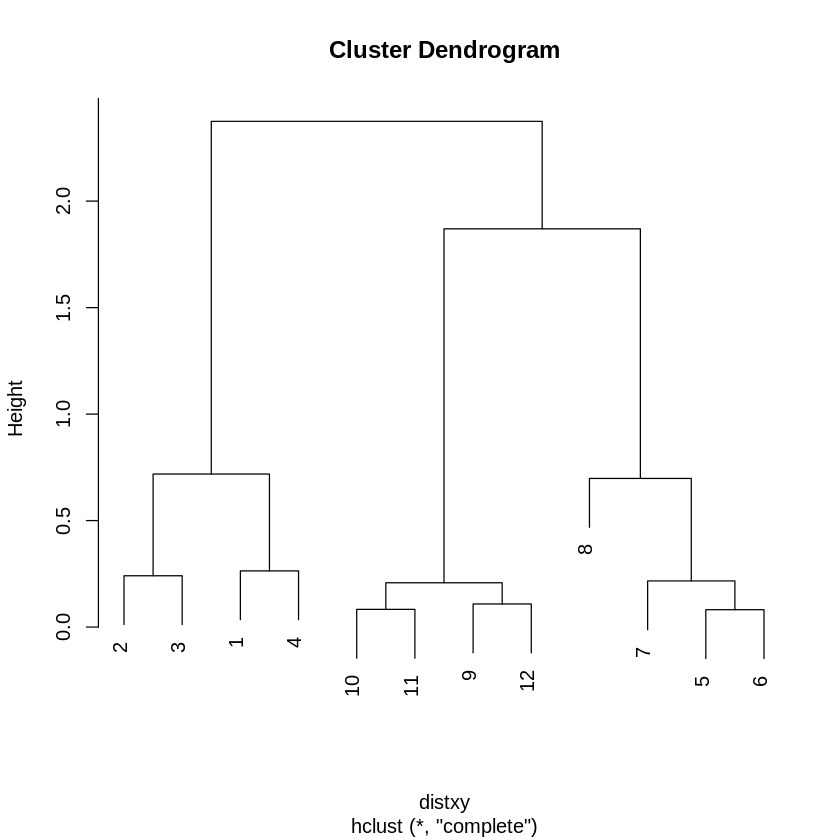

In [11]:
plot(hClustering)

To determine how many clusters we have, we cut the tree at different heights. If, say, we cut the tree at 0.5 (corresponding to a distance of 0.5) we'd find that we have five clusters. At 1.0, three clusters. At 2.5, one.

In [15]:
# Prettier dendrograms
myplclust <- function(hclust, lab=hclust$labels, lab.col=rep(1, length(hclust$labels)), hang=0.1, ...) {
    y <- rep(hclust$height, 2)
    x <- as.numeric(hclust$merge)
    y <- y[which(x < 0)]
    x <- x[which(x < 0)]
    x <- abs(x)
    y <- y[order(x)]
    x <- x[order(x)]
    plot(hclust, labels=FALSE, hang=hang, ...)
    text(x=x, y=y[hclust$order] - (max(hclust$height) * hang), labels=lab[hclust$order],
        col=lab.col[hclust$order], srt=90, adj=c(1, 0.5), xpd=NA, ...)
}

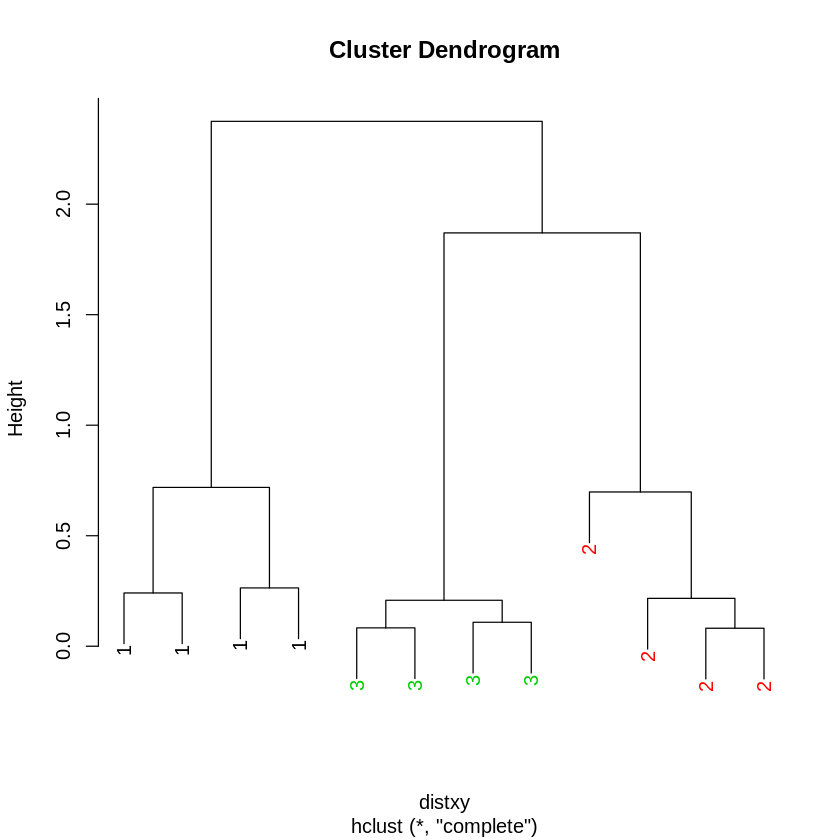

In [17]:
myplclust(hClustering, lab=rep(1:3, each=4), lab.col=rep(1:3, each=4))

### Heatmaps
This is a useful extension of the cluster dendrogram - we can use this to cluster in two dimensions.

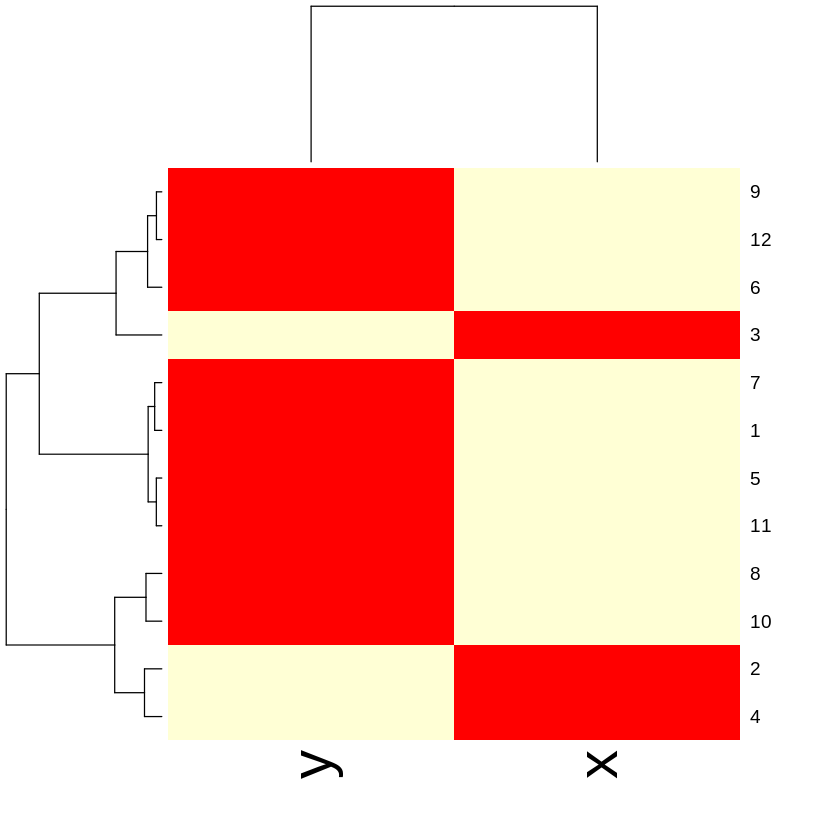

In [19]:
dataFrame.2 <- data.frame(x=x, y=y)
set.seed(143)
dataMatrix <- as.matrix(dataFrame.2)[sample(1:12), ]
heatmap(dataMatrix)

## K-means clustering
The general process is:
* Fix a number of clusters (`k`)
* Get "centroids" of the clusters
* Assign things to the closest centroids
* Recalculate the centroids

Requires:
* A distance metric
* A number of clusters
* An initial guess for centroids

Produces:
* A final estimate of cluster centroids
* An assignment of each point to a cluster

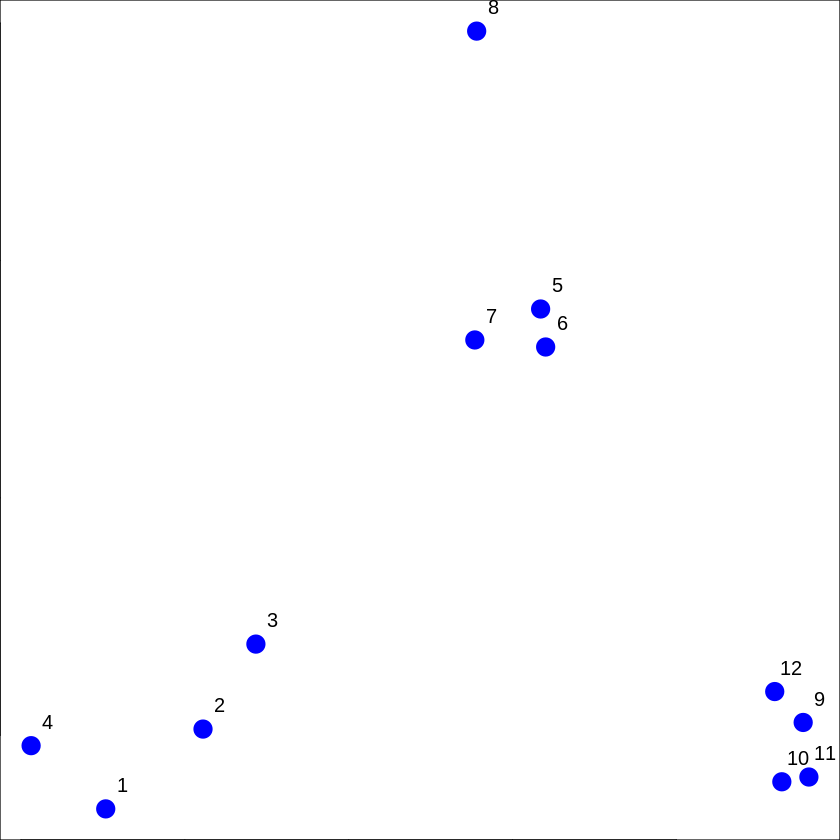

In [20]:
# Generate a plot
set.seed(1234)
par(mar = c(0, 0, 0, 0))
x <- rnorm(12, mean = rep(1:3, each=4), sd=0.2)
y <- rnorm(12, mean = rep(c(1, 2, 1), each=4), sd=0.2)
plot(x, y, col="blue", pch=19, cex=2)
text(x + 0.05, y + 0.05, labels=as.character(1:12))

In [23]:
dataFrame <- data.frame(x, y)
print(dataFrame)

           x         y
1  0.7585869 0.8447492
2  1.0554858 1.0128918
3  1.2168882 1.1918988
4  0.5308605 0.9779429
5  2.0858249 1.8977981
6  2.1012112 1.8177609
7  1.8850520 1.8325657
8  1.8906736 2.4831670
9  2.8871096 1.0268176
10 2.8219924 0.9018628
11 2.9045615 0.9118904
12 2.8003227 1.0919179


In [24]:
kmean.obj <- kmeans(dataFrame, centers=3)

In [26]:
names(kmean.obj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

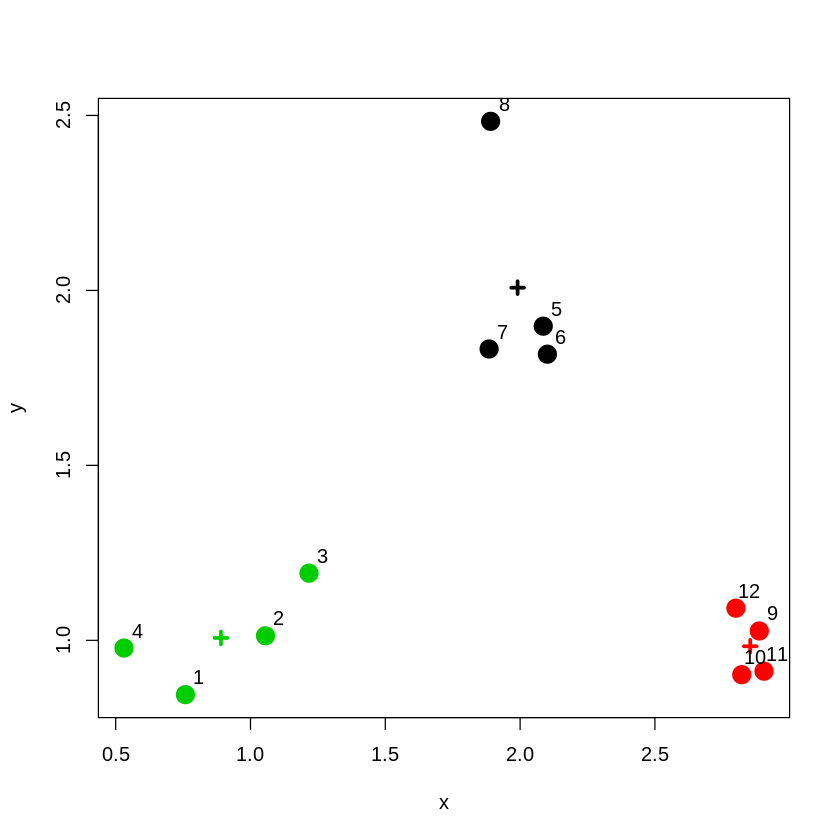

In [28]:
plot(x, y, col=kmean.obj$cluster, pch=19, cex=2)
points(kmean.obj$centers, col=1:3, pch=3, lwd=3)
text(x + 0.05, y + 0.05, labels=as.character(1:12))

## PCA and Singular Value Decomposition

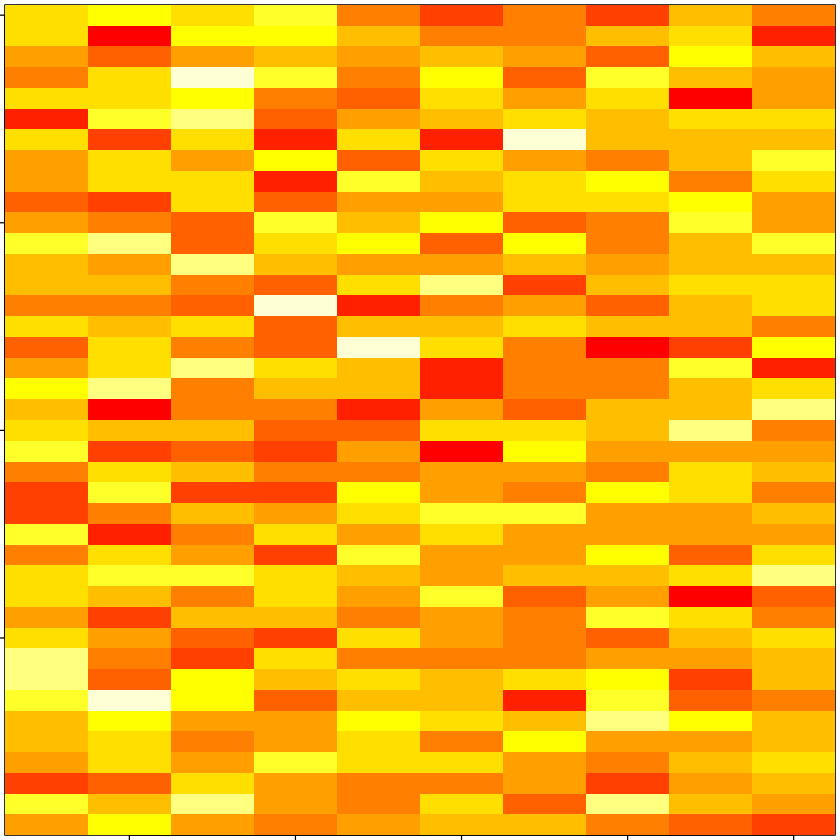

In [41]:
set.seed(12345)
par(mar = rep(0.2, 4))
dataMatrix <- matrix(rnorm(400), nrow=40)
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

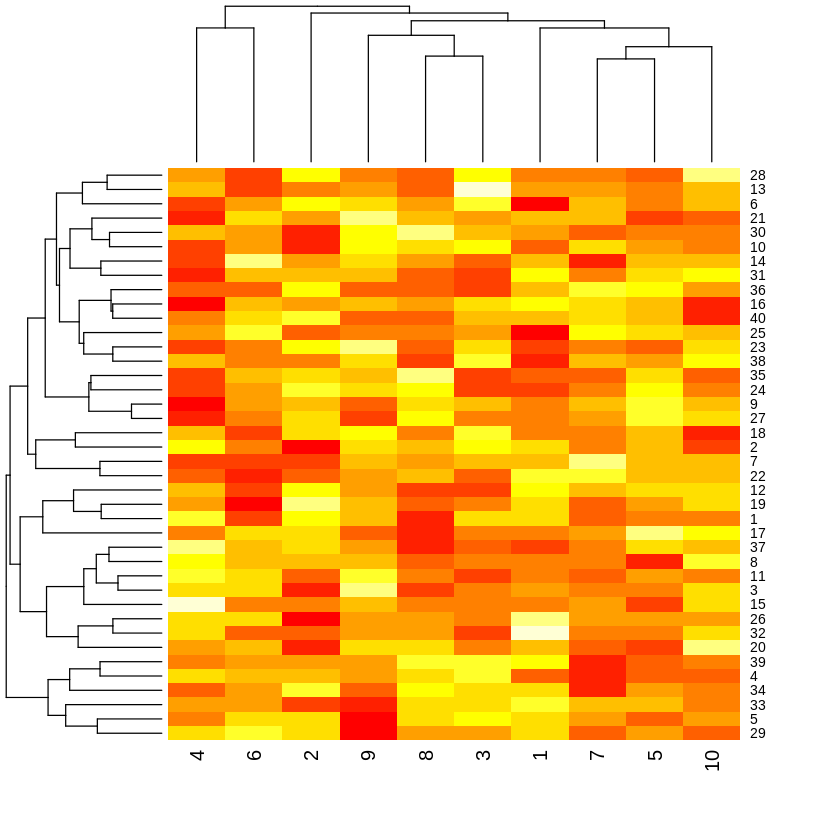

In [42]:
par(mar=rep(0.2, 4))
heatmap(dataMatrix)

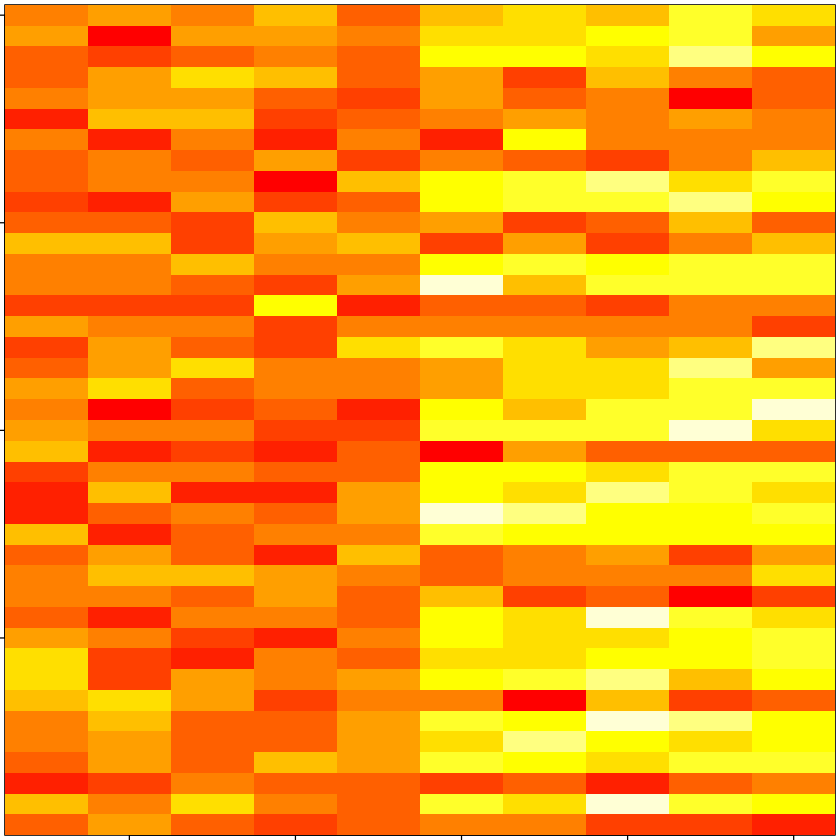

In [43]:

set.seed(678910)
for (i in 1:40) {
    # Flip a coin
    coin.flip <- rbinom(1, size=1, prob=0.5)
    if (coin.flip) {
        dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0, 3), each=5)
    }
}

par(mar=rep(0.2, 4))
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

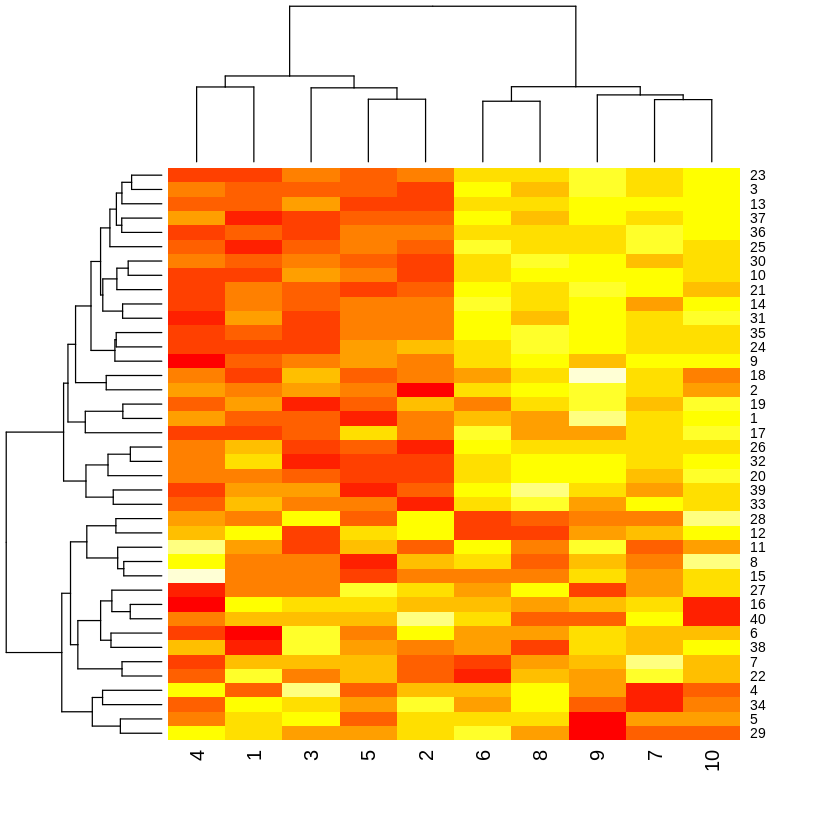

In [44]:
par(mar=rep(0.2, 4))
heatmap(dataMatrix)

### Explore the means in the rows and columns

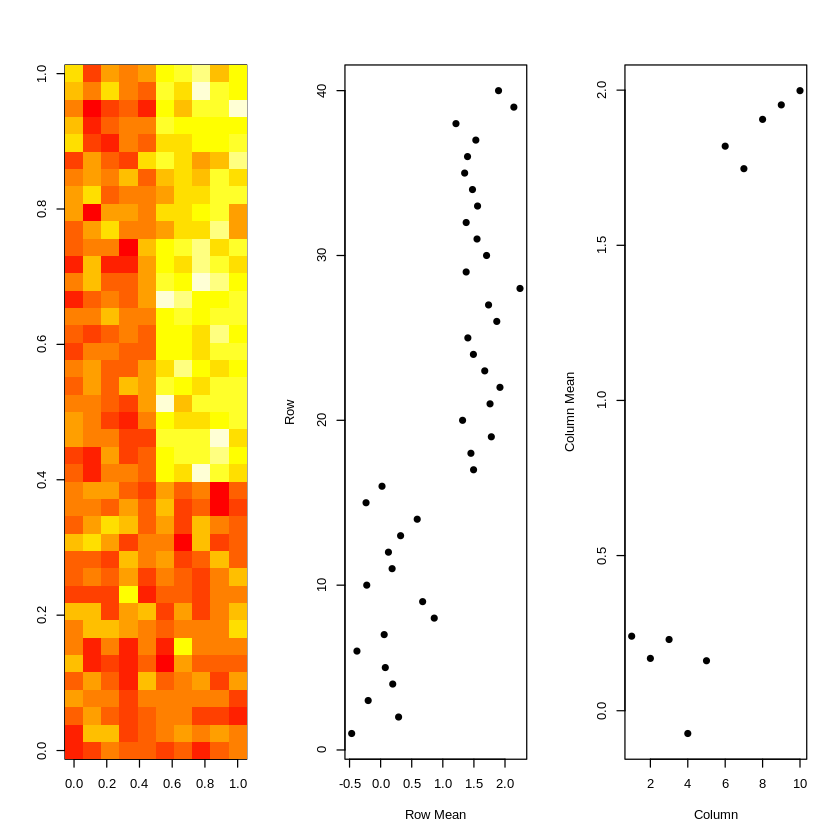

In [46]:
hh <- hclust(dist(dataMatrix))
dataMatrix.ordered <- dataMatrix[hh$order, ]
par(mfrow = c(1, 3))
image(t(dataMatrix.ordered)[, nrow(dataMatrix.ordered):1])
plot(rowMeans(dataMatrix.ordered), 40:1, , xlab= "Row Mean", ylab="Row", pch=19)
plot(colMeans(dataMatrix.ordered), xlab="Column", ylab="Column Mean", pch=19)

Interesting, but what does it mean?

Well, let us consider two problems. 

Given multivariate data $X_1, ..., X_n$ such that $X_1 = (X_{11}, ..., X_{1m})$:
* *From a statistical point of view*: Find a new set of multivariate variables that are uncorrelated and explain as much variance as possible.
* *From a data compression point of view*: if one was to put all the variables together in one matrix, what would be the best matrix created with the fewest variables (lower rank) that still explains the original data.

This is where Principle Components Analysis and Singular Value Decomposition come into play.

### SVD - Singlular-Value Decomposition

If $X$ is a matrix with each variable in a column and each observation in a row then the SVD is a "matrix decomposition."

$X = UDV^T$

where the columns of $U$ are orthogonal (left singular vectors), the columns of $V$ are orthogonal (right singular vectors) and $D$ is a diagonal matrix (singular values).

You can think of the $D$ matrix as representing the percentage of the total variation in the dataset explained by that component.

[*From Wikipedia:*](https://en.wikipedia.org/wiki/Singular-value_decomposition)

<img src="static/svd_example.png">

### PCA - Principal component analysis

The principal components are equal to the right singular values if you first scale (subtract the mean, divide by the standard deviation) the variables.

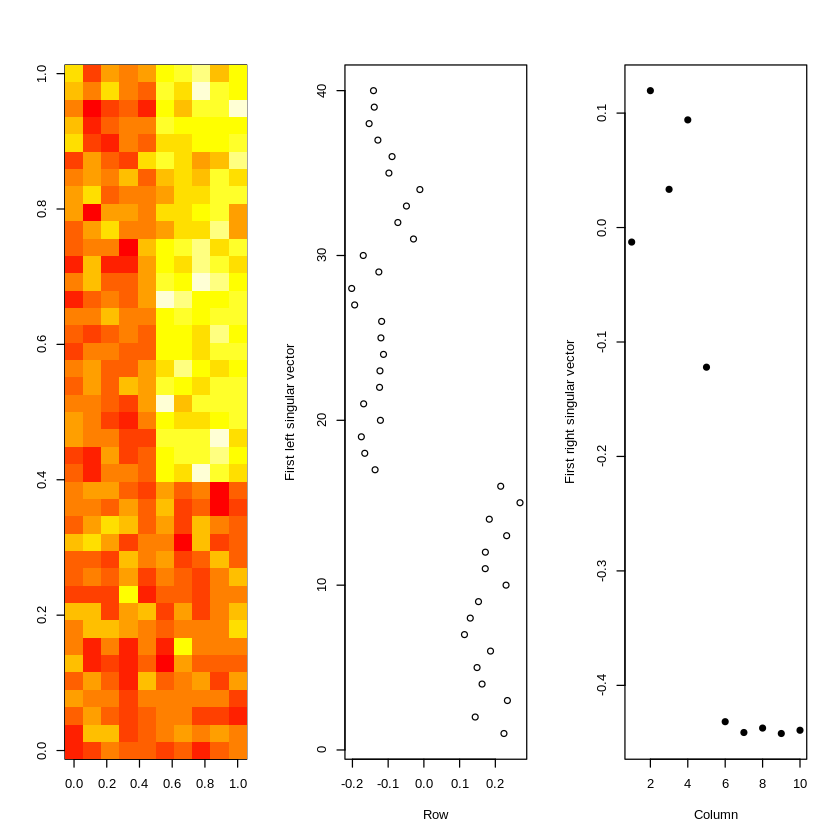

In [47]:
svd.1 <- svd(scale(dataMatrix.ordered))
par(mfrow=c(1, 3))
image(t(dataMatrix.ordered)[, nrow(dataMatrix.ordered):1])
plot(svd.1$u[, 1], 40:1, , xlab="Row", ylab="First left singular vector")
plot(svd.1$v[, 1], xlab="Column", ylab="First right singular vector", pch=19)

In [ ]:
k